in this projec we will see how to load data from an axelometre and creat a model of machine learning to train test and predict the possture of an perssone 

# importing packages you will need later 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,  confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import *
from sklearn.preprocessing import *
from sklearn.cluster import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier()


: 

## load data that I collected from my axelometer 

In [370]:
df = pd.read_csv("demo5.csv")


## visualisation of my np 

In [371]:
df.head()

,Unnamed: 0,x,y,z,omega,katsse,akev,possture
0,0,1164,-413,268,3.191775,0,0,sits down
1,1,1198,-505,260,44.077060,0,0,walk
2,2,1171,-424,287,11.115318,0,0,sits down
3,3,1169,-417,295,0.947223,0,0,sits down
4,4,1171,-418,295,0.330010,0,0,sits down


## supresion of colone that i dont need katsse , akev 

In [372]:
df.drop(['Unnamed: 0', 'katsse', 'akev'], axis=1, inplace=True)

In [373]:
df.head(10)

,x,y,z,omega,possture
0,1164,-413,268,3.191775,sits down
1,1198,-505,260,44.077060,walk
2,1171,-424,287,11.115318,sits down
3,1169,-417,295,0.947223,sits down
4,1171,-418,295,0.330010,sits down
5,1167,-416,295,0.415458,sits down
6,1169,-418,295,0.000000,sits down
7,1169,-418,295,0.000000,sits down
8,1167,-416,295,0.000000,sits down
9,1166,-417,295,0.775602,sits down


## replace the target name in a numbur for train my model 

In [374]:
df['possture'].replace(['walk','sits down','from walk to sit','none'],[0,1,2,3],inplace=True)

## chiose the feature to be X and target to be y 

In [375]:
X = df.drop("possture", axis=1)
y = df["possture"]

## choice 20% for testing and 80% for training  

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## we will opt for the decision tree model 

In [377]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [378]:
y_pred = clf.predict(X_test)

# like you can see the prediction model = 98.1% 

In [379]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9811320754716981


<function matplotlib.pyplot.show(close=None, block=None)>

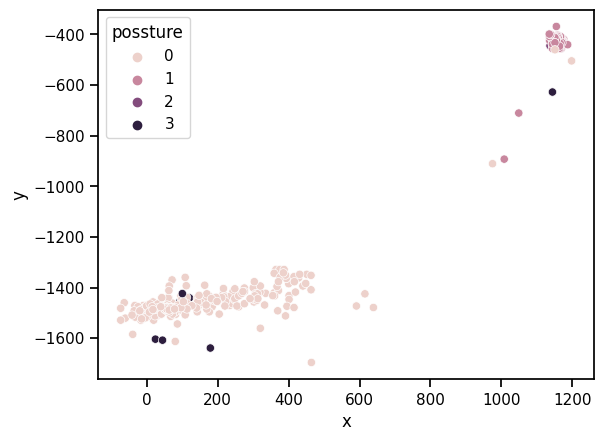

In [380]:
# plot an Understandable with seaborn
import seaborn as sns
sns.scatterplot(x='x',y='y',hue='possture',data=df)
plt.show

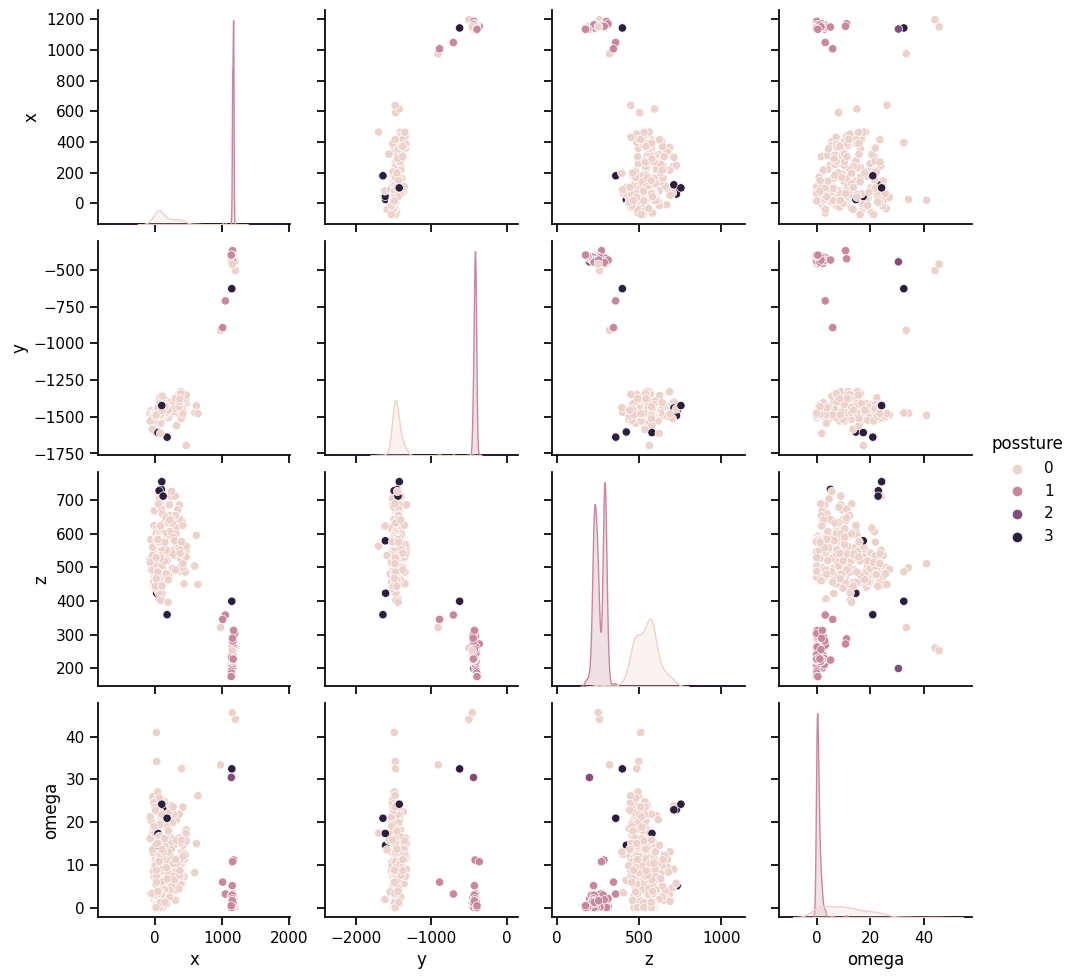

In [381]:
#here you can see a lot of graph for any categorie  
sns.pairplot(df,hue='possture')
plt.show()

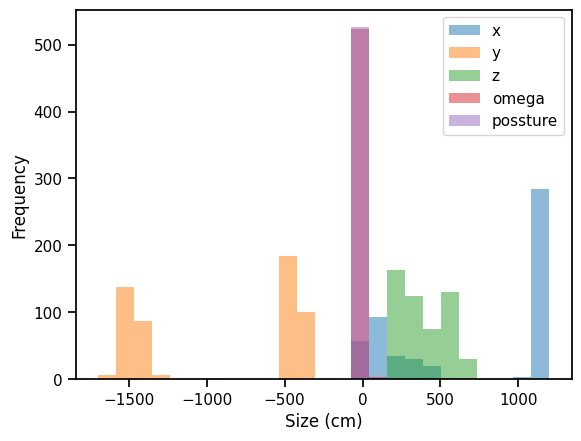

In [382]:
import seaborn as sns

sns.set_context('notebook')

# This uses the `.plot.hist` method
ax = df.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

In [383]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(y == y_pred) / float(real.shape[0])

In [384]:
#print(accuracy(y, y_pred))

In [385]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

# now i include a new value of data and we will see where the model will classify 

In [386]:
X_new = np.array([[1136,-445, 199,30]])

In [387]:

prediction = clf.predict(X_new) 
print("Prediction: {}".format(prediction)) 
print("Predicted target name: {}".format(
df['possture'][prediction]))

Prediction: [2]
Predicted target name: 2    1
Name: possture, dtype: int64


/Users/mendelsellam/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [388]:
# Plot a confusion matrix to visualize the performance
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[42  0  1]
 [ 0 62  0]
 [ 1  0  0]]


In [390]:
# Load the accelerometer data into a pandas DataFrame
df = pd.read_csv("demo5.csv")

# Extract the input features (accelerometer data) and target (posture)
X = df.drop("possture", axis=1).values
y = df["possture"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Plot a confusion matrix to visualize the performance
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 98.11%
Confusion Matrix:
[[ 0  0  1]
 [ 0 62  0]
 [ 0  1 42]]


In [392]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the accelerometer data into a pandas DataFrame
df = pd.read_csv("demo5.csv")

df['possture'].replace(['walk','sits down','from walk to sit','none'],[0,1,2,3],inplace=True)

# Extract the input features (accelerometer data) and target (posture)
X = df.drop("possture", axis=1).values
y = df["possture"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

r2 = r2_score(y_test, y_pred)
print("R^2 Score: {:.2f}".format(r2))


Mean Squared Error: 0.10
R^2 Score: 0.67


In [393]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the accelerometer data into a pandas DataFrame
df = pd.read_csv("demo5.csv")

# Extract the input features (accelerometer data) and target (posture)
X = df.drop("possture", axis=1).values
y = df["possture"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 98.11%
